<a href="https://colab.research.google.com/github/rimgosu/ColabBackup/blob/master/ex02_%EC%86%90%EA%B8%80%EC%94%A8%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
  - 손글씨 데이터를 분류하는 딥러닝 모델을 설계해보자!
  - 다중분류 딥러닝 모델을 연습해보자~

In [1]:
# 기본라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩

In [2]:
# keras 에서 제공해주는 손글씨데이터 불러오기
from tensorflow.keras.datasets import mnist

In [3]:
# 문제데이터와 정답데이터가 나뉘어 제공해주고 있음
# 훈련용, 테스트용 데이터도 나뉘어 제공
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# 데이터 크기 확인
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

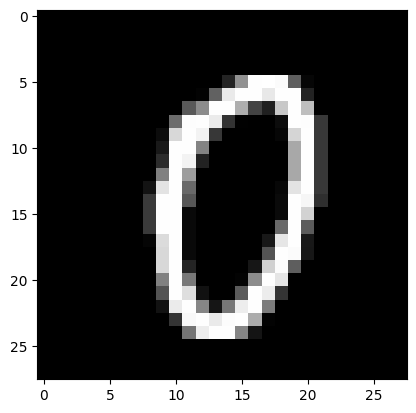

In [5]:
# 사진데이터 확인
plt.imshow(X_train[1000], cmap='gray')
# 0~255의 숫자를 가진다

In [6]:
# 정답데이터 확인
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# MLP 모델링
- 입력층의 구조, 출력층의 구조 고려
- 학습능력을 위한 중간층의 깊이 고려
- LOSS, OPTIMIZER 설정

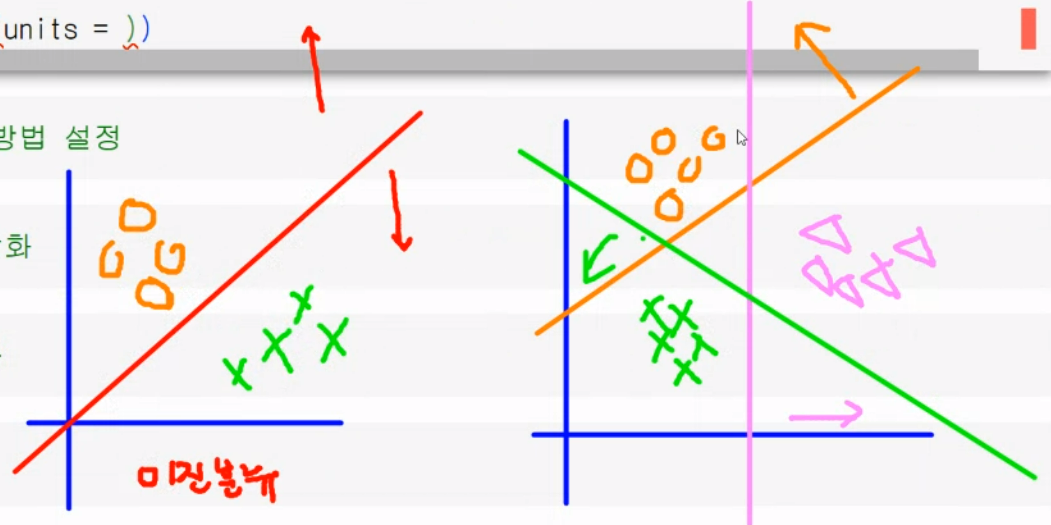

In [7]:
# 딥러닝 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Dense : 퍼셉트론을 묶음으로 표현하는 클래스
# inputLayer : 입력층 설정
# Flatten : 2차원의 사진 데이터를 1차원으로 표현하기 위한 클래

In [78]:
# 1. 신경망 설계
digit_model = Sequential()
digit_model.add(InputLayer(input_shape = (28,28)))
digit_model.add(Flatten()) # 2차원 => 1차원 변환
digit_model.add(Dense(units=16, activation='relu'))
digit_model.add(Dense(units=8, activation='relu'))
digit_model.add(Dense(units=32, activation='relu'))
digit_model.add(Dense(units=16, activation='relu'))
digit_model.add(Dense(units=8, activation='relu'))
# 출력층
digit_model.add(Dense(units=10, activation='softmax'))
# 다중 분류는 클래스의 갯수만큼 선형 모델이 필요하다
# softmax

In [79]:
# 2. 모델 학습 및 평가 방법
digit_model.compile(loss = 'categorical_crossentropy',
                    optimizer= 'SGD',
                    metrics = ['accuracy'])

# 회귀 : mean_squared_error
# 이진분류 : binary_crossentropy
# 다중분류 : categorical_crossentropy

### 3. 모델 학습 및 시각화
```
h1 = digit_model.fit(X_train,y_train,
                     validation_split=0.2,
                     epochs = 20)

# 문제 발생!
# 오류확인 => 정답데이터의 shape가 일치하지 않음! (shape가 다르면 비교 x)
# y_train 확인해보자!
```

In [10]:
# ValueError: Shapes (32, 1) and (32, 10) are incompatible
# 정답데이터의 형태 확인
y_train
# 실제 결과값 (클래스 중 하나를 출력 => 범주형)
# 모델링 결과 : 10개 클래스에 대한 각각의 확률값
# 1개와 10개는 비교가 불가능!!

# 2가지 해결방법
# [방법1. 정답데이터를 확률로 변경]
# [방법2. loss 함수를 변경 -]
# keras에서 지원하는 자동으로 정답데이터를 알아서 확률로 계산해주는 방법

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [74]:
# [방법1. 정답데이터를 확률값으로 변경하기]
# 모델의 예측값은 확률값으로 출력 / 정답 데이터는 범주형 데이터 비교(loss) 불가
# 우리가 직접 정답데이터를 범주형에서 확률값으로 변경해주자
from tensorflow.keras.utils import to_categorical
# 범주형데이터 확률값으로 변경
one_hot_y_train = to_categorical(y_train)
one_hot_y_train[0:2]
# 첫 번째 데이터 5일 확률 100%, 두 번째 데이터 0일 확률 100%1

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [80]:
# [방법2. loss 함수를 'sparse_categorical_crossentropy'라고 변경]
# 평가를 할 때 알아서 확률값으로 변경해서 계산
# 스스로 내부에서 범주값을 확률값으로 변경하는 작업을 수행 후 loss 값 계산
digit_model.compile(loss = 'sparse_categorical_crossentropy',
                    optimizer= 'SGD',
                    metrics = ['accuracy'])
# 3. 모델 학습 및 시각화
h1 = digit_model.fit(X_train,y_train,
                     validation_split=0.2,
                     epochs = 20)

# 문제 발생!
# 오류확인 => 정답데이터의 shape가 일치하지 않음! (shape가 다르면 비교 x)
# y_train 확인해보자!

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.9238 - accuracy: 0.2822 - val_loss: 1.7954 - val_accuracy: 0.3183
Epoch 2/20
1500/1500 [==============================] - 7s 4ms/step - loss: 1.4602 - accuracy: 0.4691 - val_loss: 1.1774 - val_accuracy: 0.5433
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 1.1326 - accuracy: 0.6236 - val_loss: 1.0107 - val_accuracy: 0.6680
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9800 - accuracy: 0.6858 - val_loss: 0.8402 - val_accuracy: 0.7384
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8021 - accuracy: 0.7487 - val_loss: 0.7110 - val_accuracy: 0.7912
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6716 - accuracy: 0.8001 - val_loss: 0.5800 - val_accuracy: 0.8367
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5758 - accuracy: 0.8432 - val_loss: 0.5167 - val_accuracy:

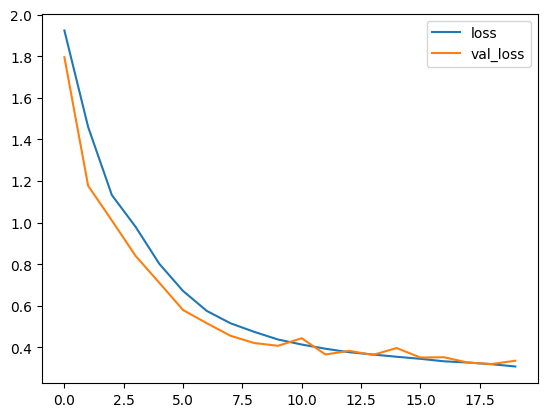

In [81]:
# 학습결과 시각화
# loss
# val_loss
# 결과 시각화
plt.plot(h1.history['loss'], label='loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [82]:
# 4. 모델 예측 및 평가
digit_model.evaluate(X_test,y_test)
# 정확도 쓰레기..

313/313 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.9089


[0.3387223482131958, 0.9089000225067139]

# 직접 작성한 손글씨 숫자 test 해보기


In [87]:
# 파이썬에서 이미지를 처리하는 라이브러리
import PIL.Image as pimg
# 이미지 오픈, 흑백이미지로 변경

def img_pre(i):
  img = pimg.open(f'/content/drive/MyDrive/Colab Notebooks/DeepLearning(Spring)/손글씨/{i}').convert('L')
  # 전처리
  # 이미지 타입을 배열로 변환
  img = np.array(img)
  img.shape
  # 2차원 => 1차원f
  test_img =img.reshape(1, 28, 28, 1)
  test_img.astype('float32') /255
  pre = digit_model.predict(test_img)
  print(f'{i} : ', pre, np.argmax(pre))
  return np.argmax(pre)

In [88]:
# 예측
for i in range(10):
  img_pre(f'{i}.png')

1/1 [==============================] - 0s 46ms/step
0.png :  [[9.1205382e-01 2.8834775e-06 1.1906070e-02 1.4530631e-03 3.7128415e-03
  4.8308321e-03 6.1974745e-02 5.9739751e-04 3.3702925e-04 3.1313035e-03]] 0
1/1 [==============================] - 0s 36ms/step
1.png :  [[0.01359812 0.01606947 0.01000168 0.04606866 0.00099756 0.66153747
  0.01006813 0.00620242 0.22028033 0.01517618]] 5
1/1 [==============================] - 0s 42ms/step
2.png :  [[0.00310047 0.04400967 0.07186032 0.6677731  0.01324542 0.09576692
  0.02414627 0.01922502 0.03203735 0.02883549]] 3
1/1 [==============================] - 0s 32ms/step
3.png :  [[7.4191792e-03 4.1593756e-03 1.2123610e-03 1.0263332e-02 1.8409953e-03
  1.3261203e-02 9.5619631e-01 1.2384299e-03 4.0938677e-03 3.1485927e-04]] 6
1/1 [==============================] - 0s 35ms/step
4.png :  [[1.0881782e-05 3.2723070e-05 5.2032069e-06 1.6705940e-02 2.8213516e-03
  1.1077624e-02 2.7730155e-07 4.2538475e-03 6.5609277e-03 9.5853120e-01]] 9
1/1 [==========